In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [233]:
TT=pd.read_csv('titanic_train.csv')

In [59]:
TT

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Called the Data set Titanic

In [60]:
TT.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These are the columns in titanic dataset

In [61]:
TT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are non null values in the titanic dataset,there are 4 coulmns with object type in this dataset.

In [62]:
TT.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Top 5 rows.

In [63]:
TT.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Bottom 5 rows.

#### Will drop the columns passengerid,Name,Ticket and Cabin as this data is not going to help us knowing the required result of survived/Non survived.

In [64]:
TT.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [65]:
TT

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Above is the filtered dataset if titanic.

In [66]:
TT.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Age column has 177 Nan values and Embarkes has 2 NaN values.

In [67]:
TT.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 people have survived and 549 people have't survived.

In [68]:
TT.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

1 class - 216 people

2 Class- 184 people

3 class - 491 people

In [69]:
TT.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

There were 577 male and 314 female on board.

In [70]:
TT.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

608 have no siblings

1 have 209 siblings

2 have 28 siblings

4 have 18 siblings

3 ahve 16 siblings

8 have 7 siblings

5 have 5 siblings

In [71]:
TT.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Above is the sum of number of Parents/Children Aboard

In [72]:
TT.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 75% of people within 38 years.

In [73]:
TT['Age']=TT['Age'].fillna(28)

Nan values in Age column are replaced with mean value.

In [145]:
TT['Fare']=TT['Fare'].fillna(32)

Nan values in Fare column replaced with mean value

In [146]:
TT.Embarked.value_counts()

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64

644 personals boarded the ship at S

168 personals boarded the ship at C

77 personals boarded the ship at Q

In [147]:
TT['Embarked']=TT['Embarked'].fillna('S')

In [148]:
TT.Embarked.value_counts()

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64

Embarked column in this dataset is replaced with mode value.

In [149]:
TT.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now there are no null values in the dataset.

In [150]:
TT.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## Correlation

In [151]:
TT.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


Above is the correlation of the attributes.

<AxesSubplot:>

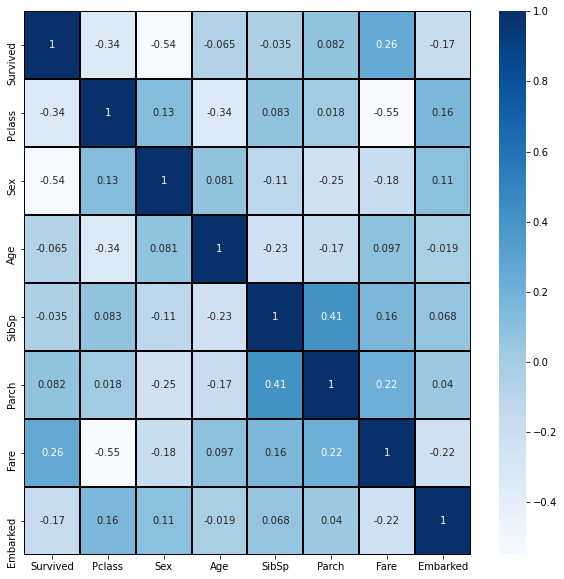

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(TT.corr(),annot=True,cmap='Blues',linewidth=1,linecolor='black')

Survived is negatively correlated with Pclass and highly correlated with Fare.

## EDA

### Univariate Analysis

<AxesSubplot:xlabel='Age'>

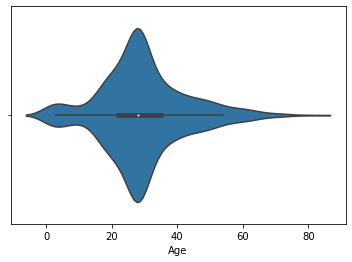

In [153]:
sns.violinplot(TT['Age'])

Age category from 20 to 40 is densly populated.

<AxesSubplot:xlabel='Fare'>

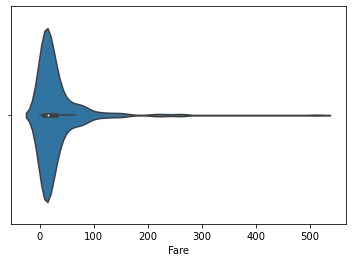

In [84]:
sns.violinplot(TT['Fare'])

There are more people in range of 0 - 100.

<AxesSubplot:xlabel='Survived', ylabel='count'>

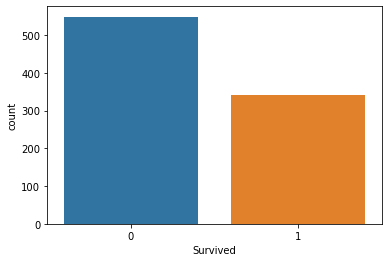

In [85]:
sns.countplot(TT['Survived'])

Plot makes clear that less people have survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

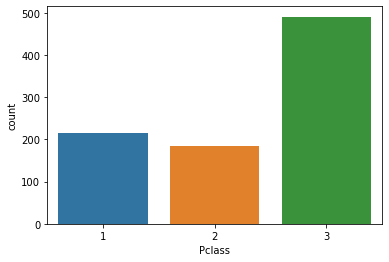

In [86]:
sns.countplot(TT['Pclass'])

More people are on board in 3rd class following to 1st class and then 2nd class.

<AxesSubplot:xlabel='Parch'>

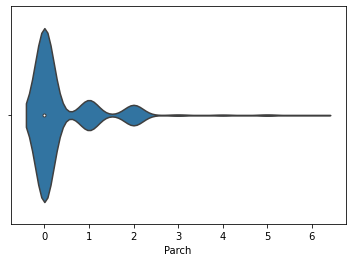

In [87]:
sns.violinplot(TT['Parch'])

Plot makes clear that most people aboard are alone.

<AxesSubplot:xlabel='SibSp'>

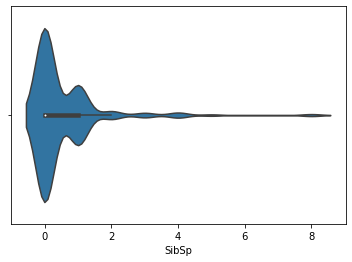

In [88]:
sns.violinplot(TT['SibSp'])

Plot makes clear that most people on board are with 2 siblings.

### Bivariate Analysis

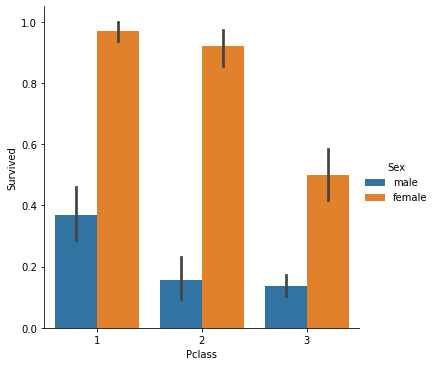

In [89]:
g=sns.catplot(y='Survived',x='Pclass',hue='Sex',data=TT,kind='bar')
plt.show()

Plot makes clear that in 
First class females have survived more than male.

Second class females have survived more than male.

Third class females have survived more than male.

In whole scenario females have survived more than male.

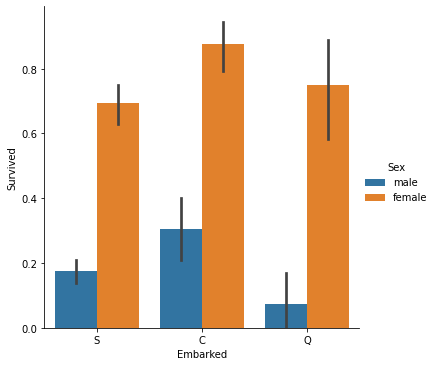

In [91]:
sns.catplot(y='Survived',x='Embarked',hue='Sex',data=TT,kind='bar')
plt.show()

Males boarded on any of the port have survived in lesser number compared to females.

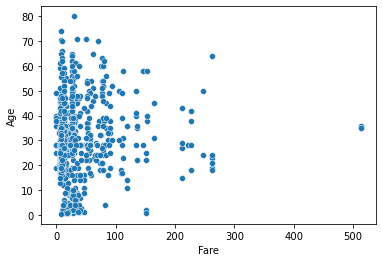

In [154]:
sns.scatterplot(x='Fare',y='Age',data=TT)
plt.show()

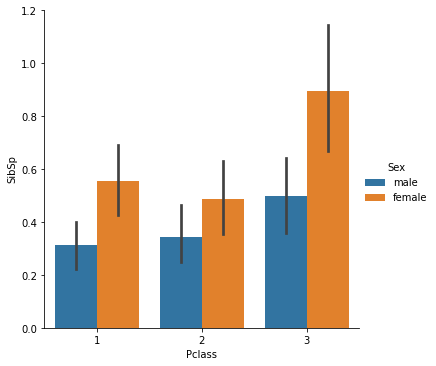

In [93]:
k=sns.catplot(y='SibSp',x='Pclass',hue='Sex',data=TT,kind='bar')
plt.show()

PLot makes clear that females in all classes have more siblings.

<AxesSubplot:xlabel='Sex', ylabel='count'>

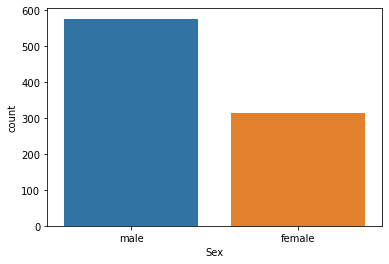

In [94]:
sns.countplot(TT['Sex'])

Males on board are more compared to females.

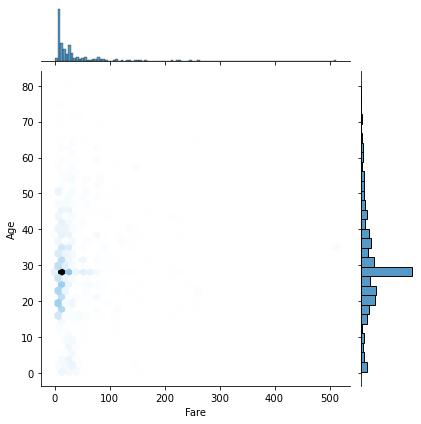

In [155]:
sns.jointplot(x='Fare',y='Age',data=TT,kind='hex')
plt.show()

Jointplot for Age v/s Fare

### Multivariate Analysis

Survived       AxesSubplot(0.125,0.125;0.0824468x0.755)
Pclass      AxesSubplot(0.223936,0.125;0.0824468x0.755)
Sex         AxesSubplot(0.322872,0.125;0.0824468x0.755)
Age         AxesSubplot(0.421809,0.125;0.0824468x0.755)
SibSp       AxesSubplot(0.520745,0.125;0.0824468x0.755)
Parch       AxesSubplot(0.619681,0.125;0.0824468x0.755)
Fare        AxesSubplot(0.718617,0.125;0.0824468x0.755)
Embarked    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

<Figure size 720x720 with 0 Axes>

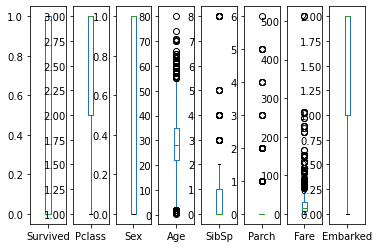

In [157]:
plt.figure(figsize=(10,10))
TT.plot(kind='box',subplots="True",layout=(1,8))

Outliers are present in Age and Fare columns.

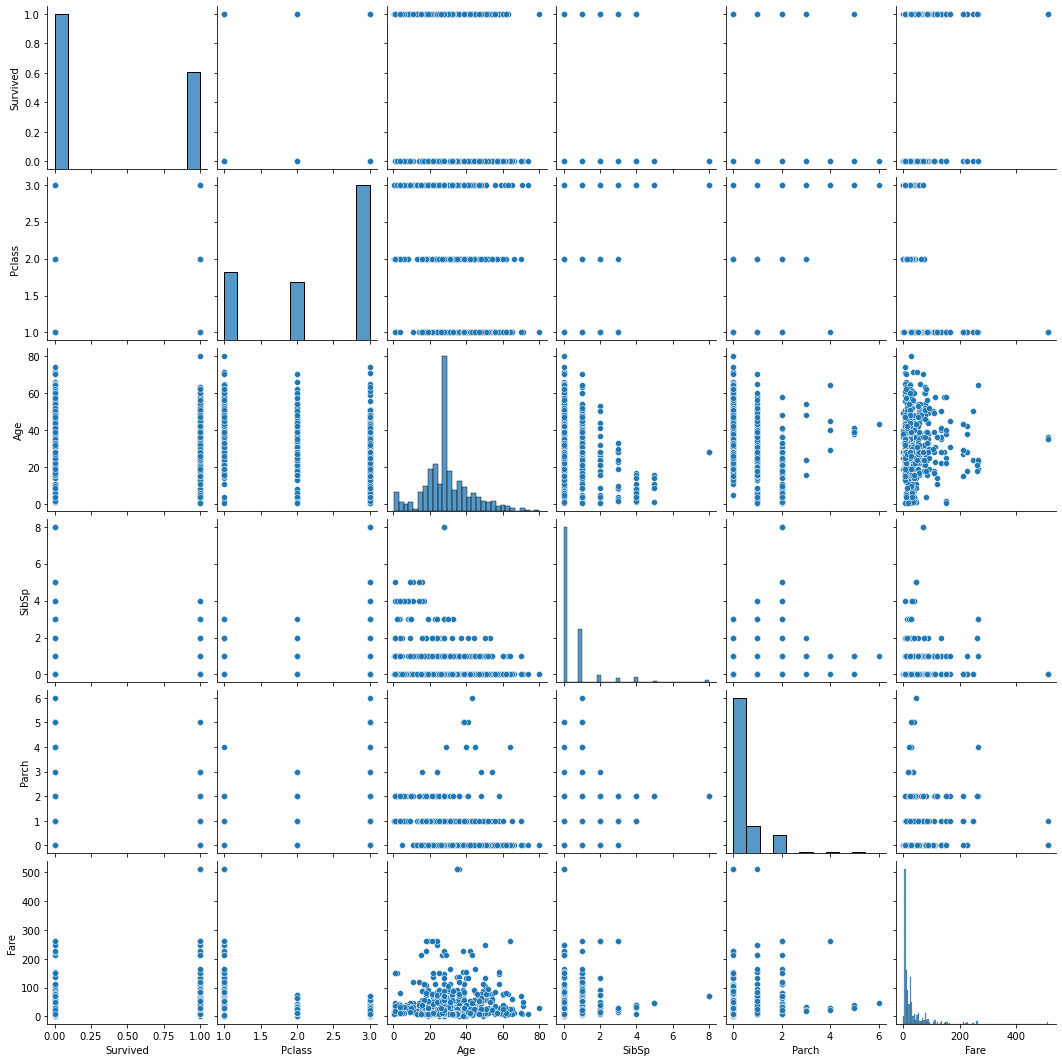

In [97]:
sns.pairplot(TT)

Pair Plot for Titanic dataset .

## Encoder

In [98]:
from sklearn.preprocessing import OrdinalEncoder

In [99]:
OE=OrdinalEncoder()

In [100]:
cols=['Sex','Embarked']
cols

['Sex', 'Embarked']

In [158]:
for i in cols:
    if TT[i].dtypes=='object':
        TT[i]=OE.fit_transform(TT[i].values.reshape(-1,1))

In [159]:
TT

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.00,1,0,7.2500,2.0
1,1,1,0.0,38.00,1,0,71.2833,0.0
2,1,3,0.0,26.00,0,0,7.9250,2.0
3,1,1,0.0,35.00,1,0,53.1000,2.0
4,0,3,1.0,35.00,0,0,8.0500,2.0
5,0,3,1.0,28.00,0,0,8.4583,1.0
6,0,1,1.0,54.00,0,0,51.8625,2.0
7,0,3,1.0,2.00,3,1,21.0750,2.0
8,1,3,0.0,27.00,0,2,11.1333,2.0
9,1,2,0.0,14.00,1,0,30.0708,0.0


Values in columns Sex and Embarked have replaced to numerical from character type 

## ZSCORE

In [160]:
z=np.abs(zscore(TT))


In [161]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


Above array have zscore more than 3, which are to be considered as outliers and eliminated from the dataset.

In [162]:
TT_new=TT[(z<3).all (axis=1)]
TT_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.00,1,0,7.2500,2.0
1,1,1,0.0,38.00,1,0,71.2833,0.0
2,1,3,0.0,26.00,0,0,7.9250,2.0
3,1,1,0.0,35.00,1,0,53.1000,2.0
4,0,3,1.0,35.00,0,0,8.0500,2.0
5,0,3,1.0,28.00,0,0,8.4583,1.0
6,0,1,1.0,54.00,0,0,51.8625,2.0
7,0,3,1.0,2.00,3,1,21.0750,2.0
8,1,3,0.0,27.00,0,2,11.1333,2.0
9,1,2,0.0,14.00,1,0,30.0708,0.0


In [163]:
TT_new.shape

(820, 8)

Survived       AxesSubplot(0.125,0.125;0.0824468x0.755)
Pclass      AxesSubplot(0.223936,0.125;0.0824468x0.755)
Sex         AxesSubplot(0.322872,0.125;0.0824468x0.755)
Age         AxesSubplot(0.421809,0.125;0.0824468x0.755)
SibSp       AxesSubplot(0.520745,0.125;0.0824468x0.755)
Parch       AxesSubplot(0.619681,0.125;0.0824468x0.755)
Fare        AxesSubplot(0.718617,0.125;0.0824468x0.755)
Embarked    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

<Figure size 720x720 with 0 Axes>

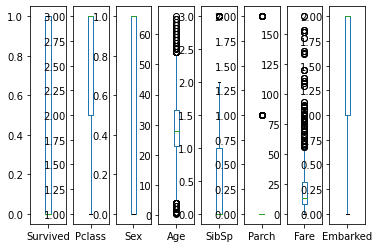

In [164]:
plt.figure(figsize=(10,10))
TT_new.plot(kind='box',subplots="True",layout=(1,8))

Major outliers are eliminated from Fare column.

In [165]:
TT.shape

(891, 8)

We have lost 8% of data from zscore method which is acceptable.

## MODEL

In [166]:
TT_x=TT_new.drop(columns=["Survived"])

In [167]:
TT_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.00,1,0,7.2500,2.0
1,1,0.0,38.00,1,0,71.2833,0.0
2,3,0.0,26.00,0,0,7.9250,2.0
3,1,0.0,35.00,1,0,53.1000,2.0
4,3,1.0,35.00,0,0,8.0500,2.0
5,3,1.0,28.00,0,0,8.4583,1.0
6,1,1.0,54.00,0,0,51.8625,2.0
7,3,1.0,2.00,3,1,21.0750,2.0
8,3,0.0,27.00,0,2,11.1333,2.0
9,2,0.0,14.00,1,0,30.0708,0.0


In [185]:
TT_x.shape

(820, 7)

TT_X is the X dataset

In [168]:
TT_y=TT_new.iloc[:,0:1]

In [169]:
TT_y

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


TT_y is target/label column.

#### We will check the skewness in TT_x

In [170]:
TT_x.skew()

Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

Need to correct the skewness only in Fare 

In [174]:
TT_x['Fare']=np.sqrt(TT_x['Fare'])

In [175]:
TT_x["Fare"].skew()

-0.004748427692764751

Skewness is reduced to -0.004 from 2.318.

In [176]:
pd.set_option('display.max_rows',None)

In [177]:
TT_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.00,1,0,1.640909,2.0
1,1,0.0,38.00,1,0,2.905674,0.0
2,3,0.0,26.00,0,0,1.677837,2.0
3,1,0.0,35.00,1,0,2.699440,2.0
4,3,1.0,35.00,0,0,1.684414,2.0
5,3,1.0,28.00,0,0,1.705378,1.0
6,1,1.0,54.00,0,0,2.683573,2.0
7,3,1.0,2.00,3,1,2.142604,2.0
8,3,0.0,27.00,0,2,1.826653,2.0
9,2,0.0,14.00,1,0,2.341727,0.0


Check the best random state value.

In [179]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(TT_x,TT_y,test_size=.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    predf=LG.predict(x_test)
    ac=accuracy_score(y_test,predf)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('best accuracy score is',maxAccu,'at random state',maxRS)        
 

best accuracy score is 0.8414634146341463 at random state 46


Wil consider as 46 as random state to run all the models as it gives best accuracy from LogisticRegression.

In [180]:
x_train,x_test,y_train,y_test=train_test_split(TT_x,TT_y,test_size=.33,random_state=46)

In [181]:
x_train.shape

(549, 7)

In [182]:
y_train.shape

(549, 1)

In [183]:
x_test.shape

(271, 7)

In [184]:
y_test.shape

(271, 1)

In [197]:
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=5)
svc=SVC(kernel='linear')
GB=GaussianNB()

In [198]:
model=[LG,DTC,KNN,svc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('The model is:',m)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(m,TT_x,TT_y,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression()
Accuracy score: 0.8339483394833949
confusion matrix [[136  17]
 [ 28  90]]
classification report               precision    recall  f1-score   support

           0       0.83      0.89      0.86       153
           1       0.84      0.76      0.80       118

    accuracy                           0.83       271
   macro avg       0.84      0.83      0.83       271
weighted avg       0.83      0.83      0.83       271



cross validation score
cross val score [0.79661017 0.8034188  0.77777778 0.74358974 0.79487179 0.78632479
 0.82051282]
cross val score mean: 0.7890151279981789
Best score: 0.04493321148521601


The model is: DecisionTreeClassifier()
Accuracy score: 0.7785977859778598
confusion matrix [[128  25]
 [ 35  83]]
classification report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       153
           1       0.77      0.70      0.73       118

    accuracy                           0.78  

Logistic Regression : ACCURACY SCORE-->83.3%  BEST MEAN SCORE-->4.4%

DecisoinTreeClassifier : ACCURACY SCORE-->78.2% BEST MEAN SCORE-->1.6%

KnNeighbours: ACCURACY SCORE-->78.2% BEST MEAN SCORE-->0.9% 

SVC('linear'):ACCURACY SCORE-->82.6% BEST MEAN SCORE-->3.5% 

SVC('rbf'):ACCURACY SCORE-->60.1% BEST MEAN SCORE-->4.2% 

SVC('poly'):ACCURACY SCORE-->60.1% BEST MEAN SCORE-->4.2% 

We tried ruuning the different models at different parameters and found DecisionTreeClasssifier is best running model with best mean accuracy score.

### Ensembling

In [209]:
rf=RandomForestClassifier(n_estimators=600)

In [210]:
    rf.fit(x_train,y_train)
    rf.score(x_train,y_train)
    pred=rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(rf,TT_x,TT_y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=600)
Accuracy score: 0.8339483394833949
confusion matrix [[138  15]
 [ 30  88]]
classification report               precision    recall  f1-score   support

           0       0.82      0.90      0.86       153
           1       0.85      0.75      0.80       118

    accuracy                           0.83       271
   macro avg       0.84      0.82      0.83       271
weighted avg       0.84      0.83      0.83       271



cross validation score
cross val score [0.76829268 0.80487805 0.83536585 0.78658537 0.81707317]
cross val score mean: 0.802439024390244
Best score: 0.031509315093150914




RandomForestClassifier(100) :ACCURACY SCORE-->82.6% BEST MEAN SCORE-->2.2% 
    
RandomForestClassifier(200) :ACCURACY SCORE-->82.6% BEST MEAN SCORE-->2.2% 

RandomForestClassifier(400) :ACCURACY SCORE-->83.3% BEST MEAN SCORE-->3.5%  
    
RandomForestClassifier(600) :ACCURACY SCORE-->83.3% BEST MEAN SCORE-->3.1%      

In [217]:
ad=AdaBoostClassifier(n_estimators=150)

In [218]:
    ad.fit(x_train,y_train)
    ad.score(x_train,y_train)
    pred=ad.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ad,TT_x,TT_y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=150)
Accuracy score: 0.8228782287822878
confusion matrix [[136  17]
 [ 31  87]]
classification report               precision    recall  f1-score   support

           0       0.81      0.89      0.85       153
           1       0.84      0.74      0.78       118

    accuracy                           0.82       271
   macro avg       0.83      0.81      0.82       271
weighted avg       0.82      0.82      0.82       271



cross validation score
cross val score [0.77439024 0.79268293 0.83536585 0.78658537 0.80487805]
cross val score mean: 0.7987804878048781
Best score: 0.024097740977409687




AdaBoostClassifier(250) :ACCURACY SCORE-->83.02% BEST MEAN SCORE-->2.6% 
    
AdaBoostClassifier(50) :ACCURACY SCORE-->82.2% BEST MEAN SCORE-->3.0%    

AdaBoostClassifier(150) :ACCURACY SCORE-->82.02% BEST MEAN SCORE-->2.4%     

## HYPER PARAMETER TUNNING

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
params = { 'criterion': ['gini','entropy'],'max_depth': [2,3,5,10,20],'min_samples_leaf':[5,10,20,50]}

In [224]:
grid_search=GridSearchCV(estimator=DTC,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [227]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

In [226]:
grid_search.best_score_

0.7923542790648471

### After Hyper Tunning the model Decision Tree classifer we come to know the model is running best at criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5} parameter and best score we get is 79.2%%

## AUC ROC CURVE FOR DTC

In [229]:
y_pred_prob=DTC.predict_proba(x_test)[:,-1]

In [230]:
y_pred_prob

array([1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.125     , 1.        ,
       1.        , 1.        , 0.8       , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.8       , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.     

In [234]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [235]:
fpr

array([0.        , 0.1503268 , 0.15686275, 0.16339869, 0.18300654,
       0.22222222, 1.        ])

In [236]:
tpr

array([0.        , 0.6779661 , 0.70338983, 0.70338983, 0.71186441,
       0.71186441, 1.        ])

In [238]:
thresholds

array([2.        , 1.        , 0.8       , 0.66666667, 0.5       ,
       0.125     , 0.        ])

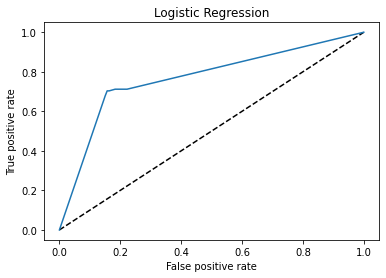

In [239]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [245]:
auc_score=roc_auc_score(y_test,DTC.predict(x_test))

In [246]:
auc_score

0.7699955688490085

## DTC is the best model for Titanic DATASET

### JOBLIB

In [247]:
joblib.dump(DTC,'TT.obj')

['TT.obj']